In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the sales data
df=pd.read_csv("C:\\Users\chakri\Downloads\expanded_sales_data.csv")

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chakri\AppData\Local\Temp\ipykernel_14964\737040280.py:2: SyntaxWarning: invalid escape sequence '\c'
  df=pd.read_csv("C:\\Users\chakri\Downloads\expanded_sales_data.csv")


In [5]:
df.head(15)

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
0,2024-11-01,S001,P001,50,500.75,10.5,Regular
1,2024-11-01,S002,P002,75,1200.50,5.0,Premium
2,2024-11-02,S001,P001,30,300.50,0.0,New
3,2024-11-02,S003,P003,60,900.00,7.5,Regular
4,2024-11-03,S002,P001,40,400.60,10.0,Premium
5,2024-11-03,S003,P002,55,1100.75,15.0,New
6,2024-11-04,S001,P003,20,250.25,0.0,Regular
7,2024-11-04,S003,P004,80,1600.50,5.5,Premium
8,2024-11-05,S002,P004,90,1800.75,10.0,New
9,2024-11-05,S001,P002,35,450.75,0.0,Regular


In [6]:
df.describe()

,Units Sold,Sales Amount,Discount Applied
count,50.00000,50.000000,50.000000
mean,54.40000,981.556000,9.886000
std,24.87766,481.173161,6.322006
min,11.00000,213.370000,0.000000
25%,32.75000,531.475000,4.550000
50%,54.00000,978.015000,10.000000
75%,74.75000,1284.737500,16.175000
max,100.00000,1984.320000,19.200000


In [7]:
df.isnull().sum()

Date                0
Store ID            0
Product ID          0
Units Sold          0
Sales Amount        0
Discount Applied    0
Customer Segment    0
dtype: int64

 Step 1: Data Cleaning


In [8]:
# Fill missing values for numerical columns
df['Units Sold'].fillna(df['Units Sold'].mean(), inplace=True)
df['Sales Amount'].fillna(df['Sales Amount'].median(), inplace=True)
df['Discount Applied'].fillna(0, inplace=True)

C:\Users\chakri\AppData\Local\Temp\ipykernel_14964\4248622353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Units Sold'].fillna(df['Units Sold'].mean(), inplace=True)
C:\Users\chakri\AppData\Local\Temp\ipykernel_14964\4248622353.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [9]:
# Handle incorrect date format by converting to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)  # Remove rows with invalid dates

In [10]:
#Handling Outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply the function to relevant columns
for col in ["Units Sold", "Sales Amount", "Discount Applied"]:
    df = handle_outliers(df, col)

# Save the cleaned DataFrame
output_cleaned_path = 'sales_data_cleaned.csv'
df.to_csv(output_cleaned_path, index=False)


 Step 2: Data Aggregation

In [11]:
daily_sales = df.groupby('Date')['Sales Amount'].sum().reset_index()

In [12]:
store_sales = df.groupby('Store ID')['Sales Amount'].sum().reset_index()

In [13]:
product_sales = df.groupby('Product ID')['Sales Amount'].agg(['sum', 'mean']).reset_index()

Step 3: Analysis

In [14]:
# total and average sales per product
sales_per_product = df.groupby("Product ID")["Sales Amount"].agg(Total_Sales="sum", Average_Sales="mean")
sales_per_product

,Total_Sales,Average_Sales
Product ID,,
P001,4334.58,722.430000
P002,14374.49,1105.730000
P003,5214.45,474.040909
P004,14152.93,1415.293000
P005,11001.35,1100.135000


In [15]:
# Store with the highest sales performance
top_store = store_sales.loc[store_sales['Sales Amount'].idxmax()]
top_store

Store ID           S002
Sales Amount    17163.2
Name: 1, dtype: object

In [17]:
# Calculate correlation between discount and sales amount to analyze discount impact
discount_sales_corr = df[['Discount Applied', 'Sales Amount']].corr().iloc[0, 1]
discount_sales_corr

-0.10876984535236521

Step 4: Visualization

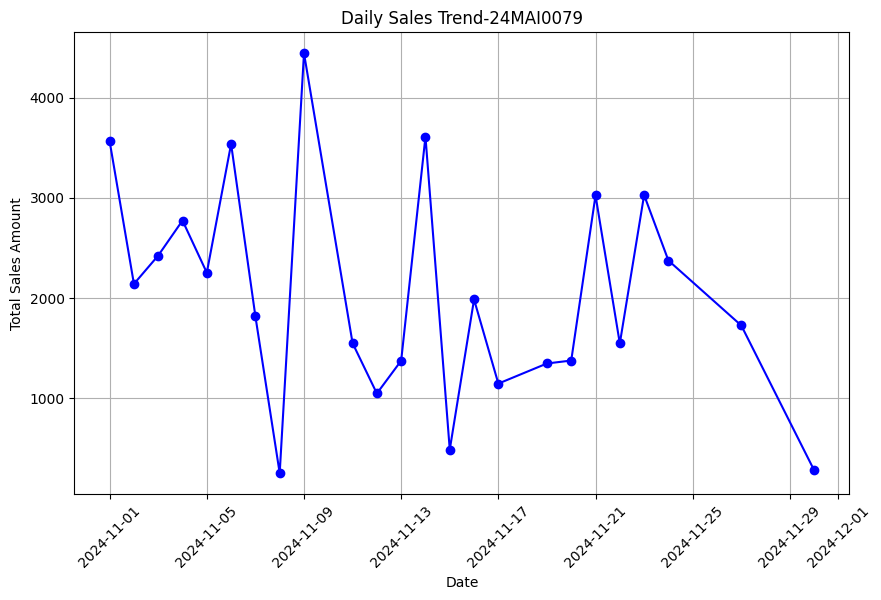

In [21]:
# Sales Trend Over Time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales Amount'], marker='o', color='b')
plt.title("Daily Sales Trend-24MAI0079")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

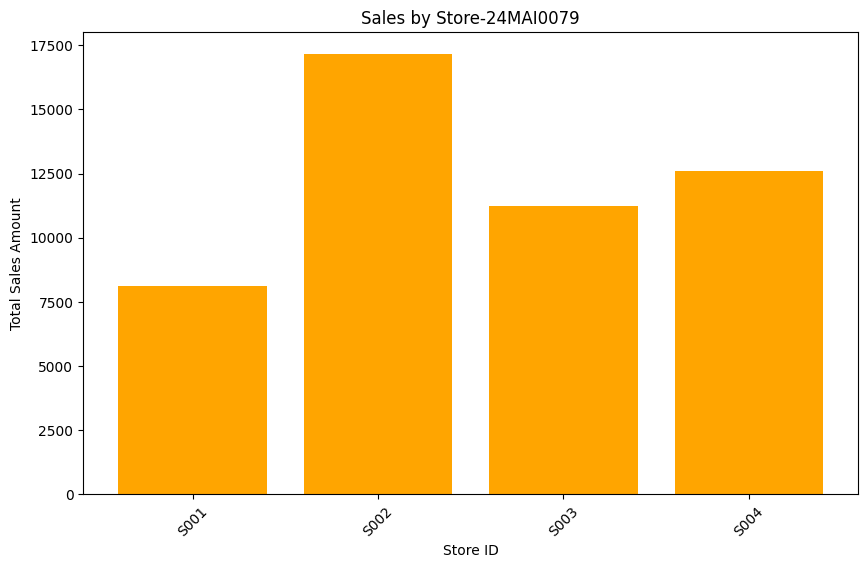

In [22]:
# Sales Distribution Across Stores
plt.figure(figsize=(10, 6))
plt.bar(store_sales['Store ID'], store_sales['Sales Amount'], color='orange')
plt.title("Sales by Store-24MAI0079")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

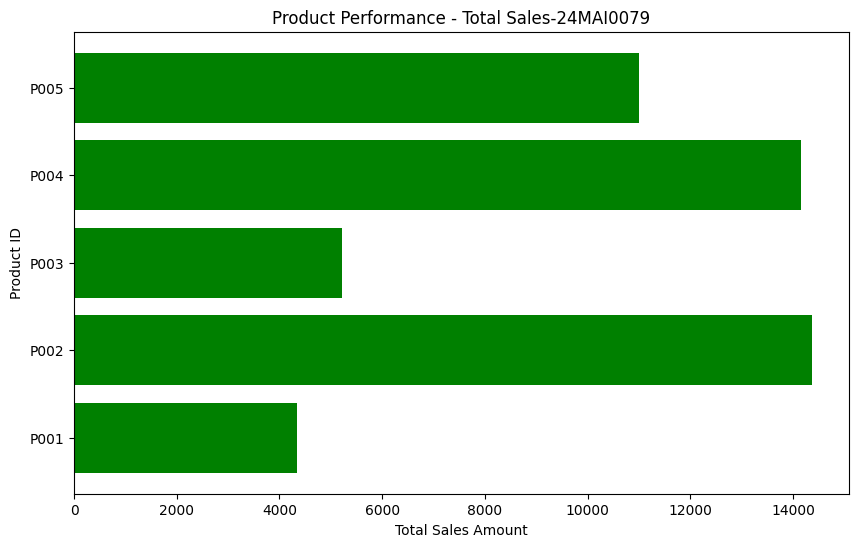

In [23]:
# Product Performance (Total Sales per Product)
plt.figure(figsize=(10, 6))
plt.barh(product_sales['Product ID'], product_sales['sum'], color='green')
plt.title("Product Performance - Total Sales-24MAI0079")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product ID")
plt.show()